## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `bees_num` | The total number of bee individuals in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plot. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## ❓ Questions
1. What is the difference between a native and non-native bee species?
2. What is the difference between a native and non-native plant species?
3. What is the difference between a parasitic and non-parasitic bee species?
4. What is the difference between a specialist and generalist bee species?
5. What identifies the plant species a bee species prefers?


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

pd.set_option('display.max_colwidth', 100)


In [51]:
df = pd.read_csv("plants_and_bees.csv")

df.head()

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


<h2>Exploratory Data Analysis (EDA)</h2>

<ul>
<li> Gain insights into the distribution of variables </li>
<li> Identify missing values </li>
<li> Identify outliers </li>
<li> Identify relationships between variables </li>
</ul>

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   bees_num        1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [53]:
df.describe()

,sample_id,bees_num,time,parasitic,nonnative_bee
count,1250.000000,1250.000000,1250.000000,1187.000000,1189.000000
mean,17441.209600,22.450400,1069.160000,0.074136,0.029437
std,22.649293,13.691074,199.032524,0.262103,0.169098
min,17400.000000,1.000000,900.000000,0.000000,0.000000
25%,17424.000000,12.000000,930.000000,0.000000,0.000000
50%,17442.000000,20.000000,1015.000000,0.000000,0.000000
75%,17461.000000,32.000000,1105.000000,0.000000,0.000000
max,17481.000000,60.000000,1730.000000,1.000000,1.000000


In [54]:
df.describe(exclude='number')

,date,season,site,native_or_non,sampling,plant_species,bee_species,sex,specialized_on,nesting,status
count,1250,1250,1250,1250,1250,1250,1250,1250,7,1196,15
unique,9,2,3,2,2,24,93,2,2,6,3
top,06/13/2017,early.season,B,non-native,pan traps,None,Halictus poeyi/ligatus,f,Penstemon,ground,vulnerable (IUCN)
freq,219,936,459,644,820,820,252,1047,5,970,7


In [55]:
# missing values in percentage
df.isnull().sum()/len(df)*100


sample_id          0.00
bees_num           0.00
date               0.00
season             0.00
site               0.00
native_or_non      0.00
sampling           0.00
plant_species      0.00
time               0.00
bee_species        0.00
sex                0.00
specialized_on    99.44
parasitic          5.04
nesting            4.32
status            98.80
nonnative_bee      4.88
dtype: float64

<h3>Dropping "specialized_on" and "status" columns</h3>

<p>We drop these columns as they contain >90% missing values.</p>

In [56]:
# drop "specialized_on" and "status" columns
df.drop(['specialized_on', 'status'], axis=1, inplace=True)

# drop rows with missing values
df.dropna(inplace=True)


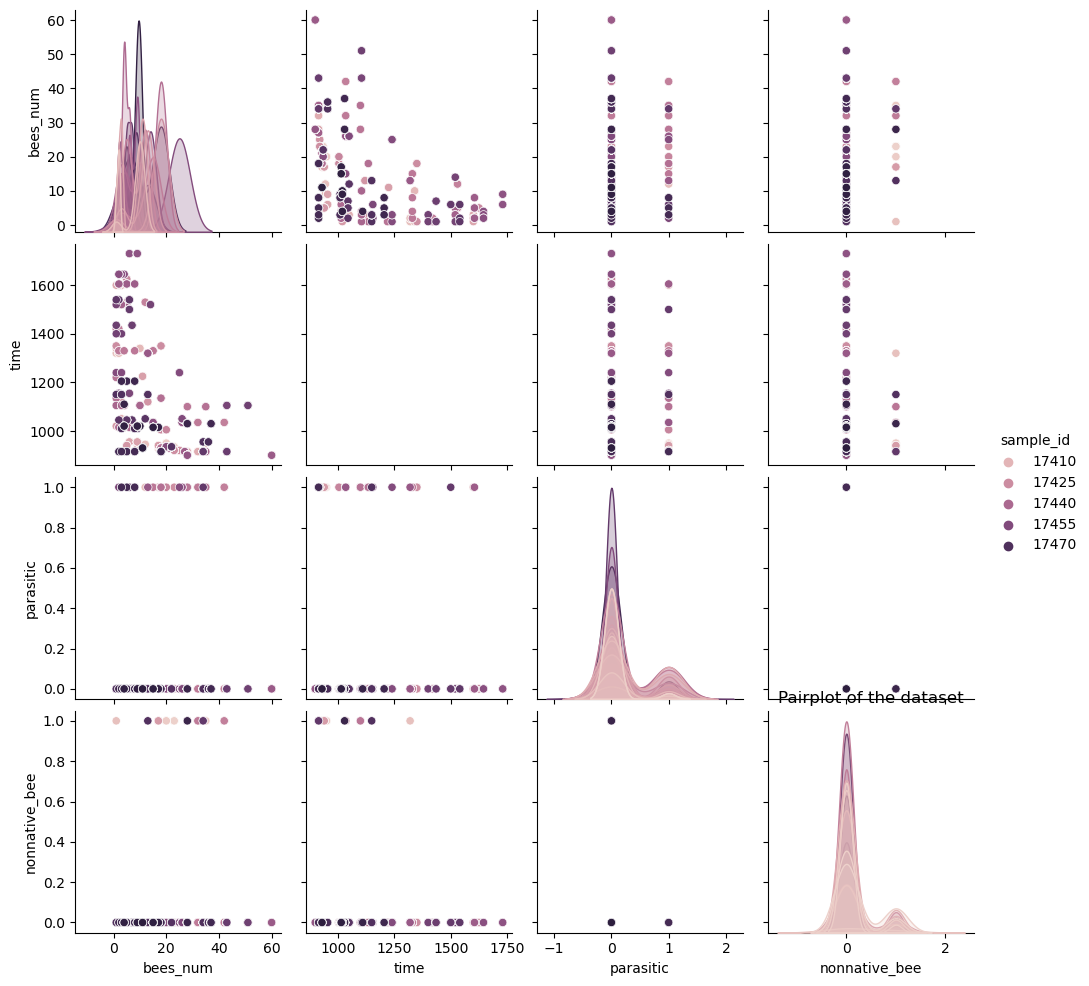

In [57]:
sns.pairplot(df, hue='sample_id')
plt.title('Pairplot of the dataset')
plt.show()

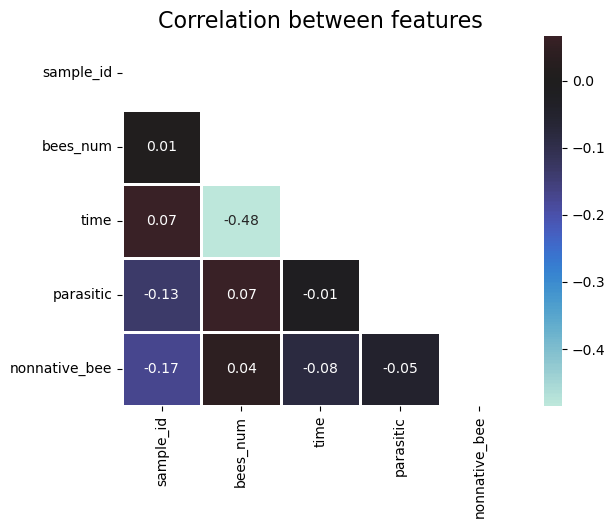

In [58]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    df.corr(), 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    center=0
    )

plt.title('Correlation between features', fontsize=16)

plt.show()

<h3>-0.50 correlation between time and bees_num</h3>
<p>The correlation between time and bees_num is -0.50. This means that as time increases, bees_num decreases. This is because the samples were taken in the early and late seasons. As time increases, the season changes from early to late. As the season changes from early to late, the number of bees decreases.</p>

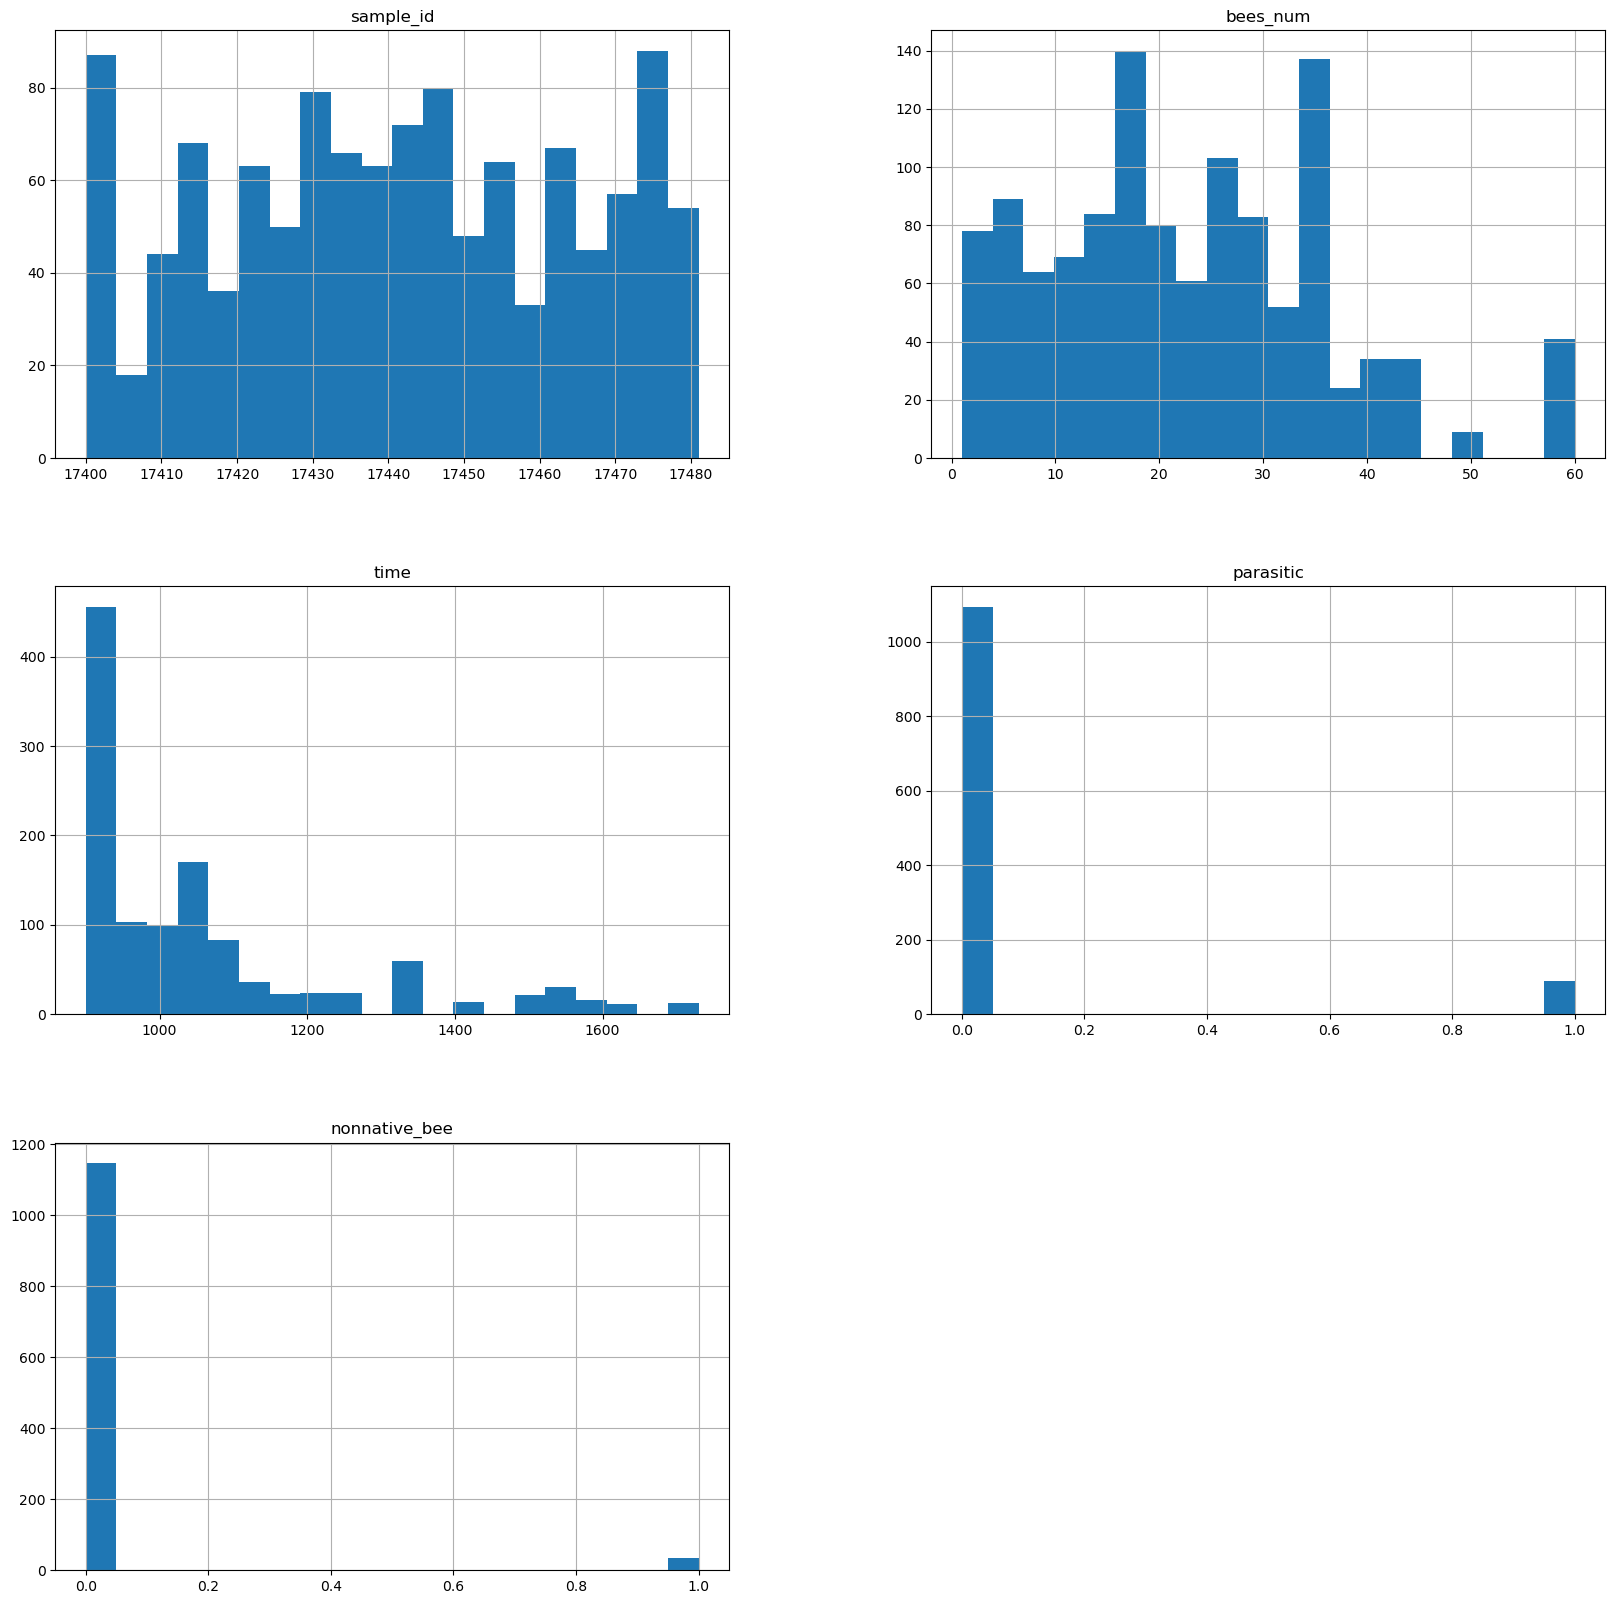

In [59]:
# check the distribution of each feature
df.hist(figsize=(20, 20), bins=20)
plt.show()


<h3>Exploring bees_num</h3>

<p>This feature indicates the total number of bee individuals in the sample. The minimum value is 1 and the maximum value is 60. The mean is 22.45. The standard deviation is 13.69. The distribution is right-skewed.</p>

In [60]:
df['bees_num'].describe()

count    1182.000000
mean       22.576142
std        13.562183
min         1.000000
25%        12.000000
50%        21.000000
75%        32.000000
max        60.000000
Name: bees_num, dtype: float64

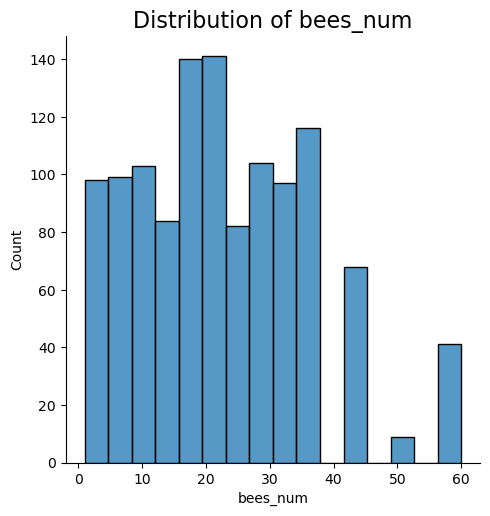

In [61]:
# plot the skewness of bees_num
sns.displot(df['bees_num'])
plt.title('Distribution of bees_num', fontsize=16)
plt.show()


<h2>Bee Abundance and Species Richness Analysis</h3> 
<hr>
<p>Analyze the <code>bees_num</code> column to study the abundance of bees in different samples and the <code>bee_species</code> column to investigate the diversity of bee species present. Plotting histograms or bar charts can provide an overview of bee abundance and species richness across different factors such as <code>season</code>, <code>site</code>, and <code>native_or_non</code></p>

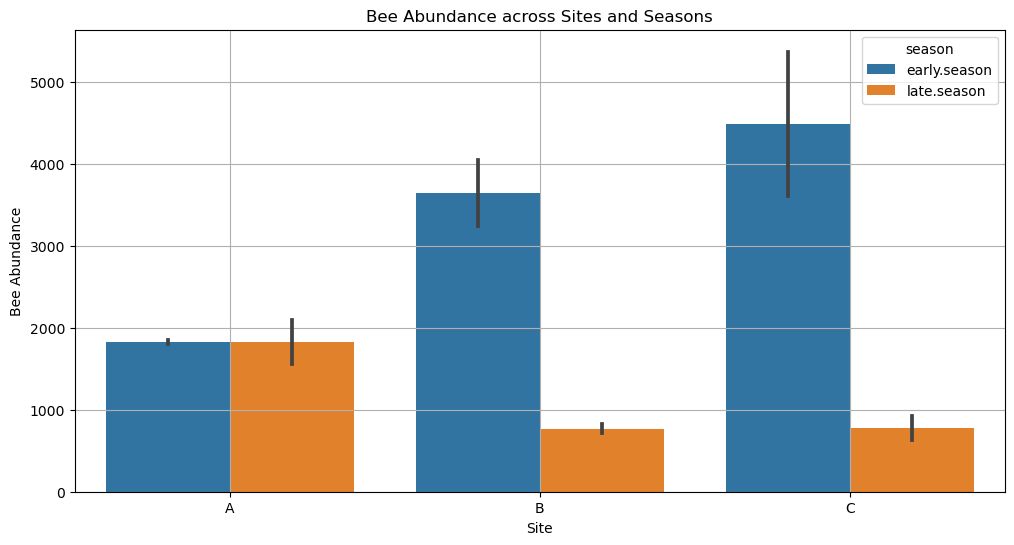

In [68]:
# Calculate the total bee abundance:

bee_abundance = df.groupby(['season', 'site', 'native_or_non'])['bees_num'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='site', y='bees_num', hue='season', data=bee_abundance)
plt.title('Bee Abundance across Sites and Seasons')
plt.xlabel('Site')
plt.ylabel('Bee Abundance')
plt.grid()
plt.show()

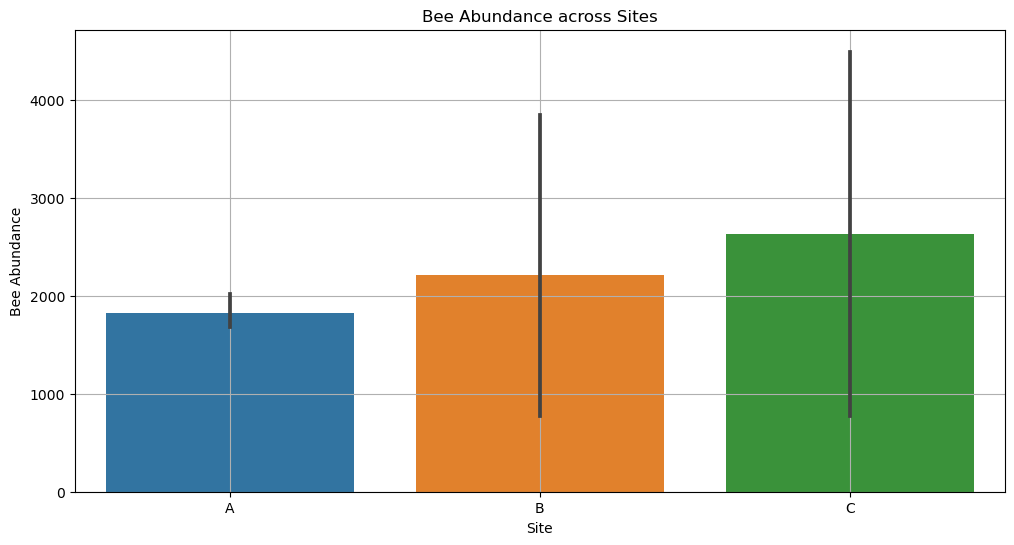

In [71]:

plt.figure(figsize=(12, 6))
sns.barplot(x='site', y='bees_num', data=bee_abundance)
plt.title('Bee Abundance across Sites')
plt.xlabel('Site')
plt.ylabel('Bee Abundance')
plt.grid()
plt.show()

In [64]:
# print bee abundance means for each site in early season
print('Bee abundance means for each site in early season:')
print(bee_abundance[bee_abundance['season'] == 'early.season'].groupby('site')['bees_num'].mean())

# print bee abundance means for each site in late season
print('Bee abundance means for each site in late season:')
print(bee_abundance[bee_abundance['season'] == 'late.season'].groupby('site')['bees_num'].mean())

# print bee abundance means for each site
print('Bee abundance means for each site:')
print(bee_abundance.groupby('site')['bees_num'].mean())



Bee abundance means for each site in early season:
site
A    1829.5
B    3647.0
C    4490.0
Name: bees_num, dtype: float64
Bee abundance means for each site in late season:
site
A    1828.0
B     771.0
C     777.0
Name: bees_num, dtype: float64
Bee abundance means for each site:
site
A    1828.75
B    2209.00
C    2633.50
Name: bees_num, dtype: float64


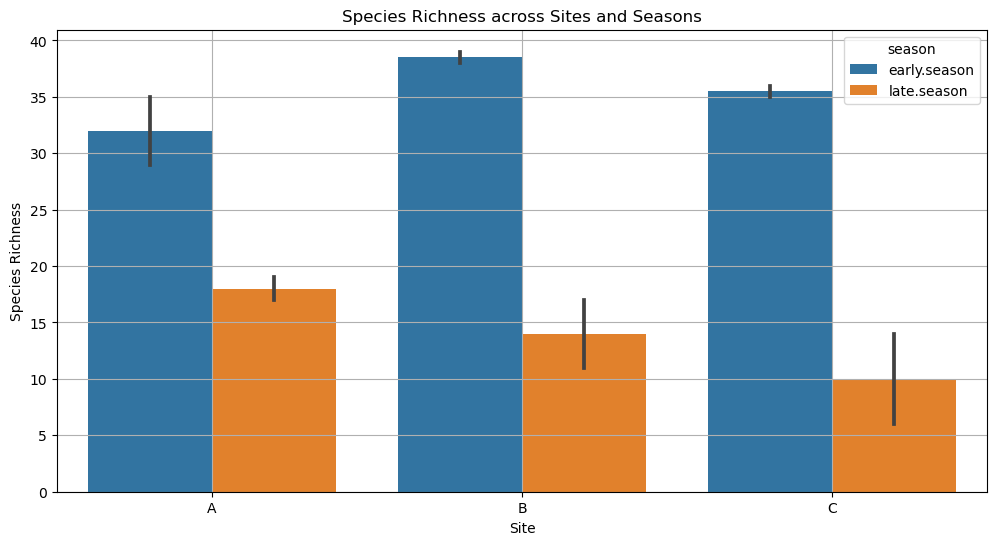

In [69]:
# Calculate the species richness:
species_richness = df.groupby(['season', 'site', 'native_or_non'])['bee_species'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='site', y='bee_species', hue='season', data=species_richness)
plt.title('Species Richness across Sites and Seasons')
plt.xlabel('Site')
plt.ylabel('Species Richness')
plt.grid()
plt.show()


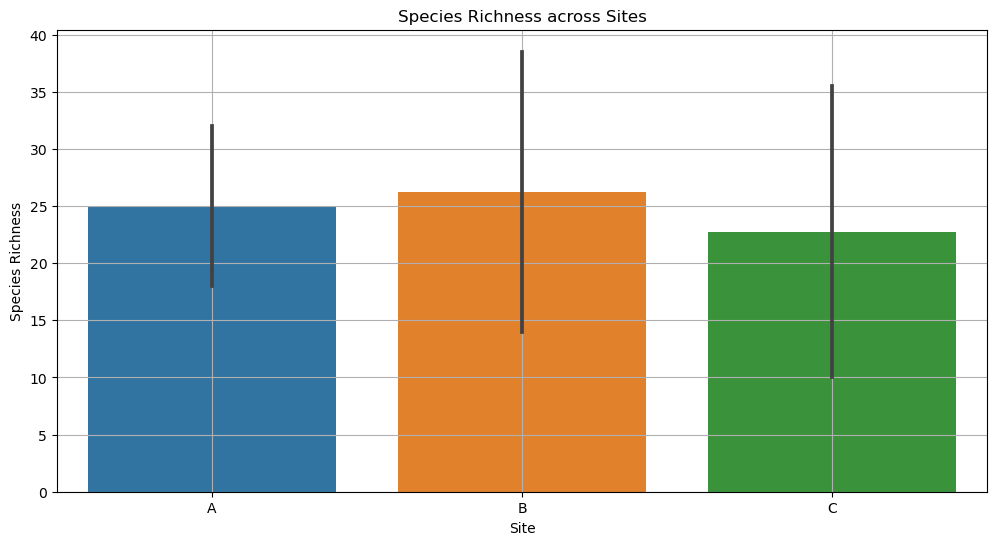

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x='site', y='bee_species', data=species_richness)
plt.title('Species Richness across Sites')
plt.xlabel('Site')
plt.ylabel('Species Richness')
plt.grid()
plt.show()

In [66]:
print('Species richness means for each site in early season:')
print(species_richness[species_richness['season'] == 'early.season'].groupby('site')['bee_species'].mean())

print('Species richness means for each site in late season:')
print(species_richness[species_richness['season'] == 'late.season'].groupby('site')['bee_species'].mean())

print('Species richness means for each site:')
print(species_richness.groupby('site')['bee_species'].mean())

Species richness means for each site in early season:
site
A    32.0
B    38.5
C    35.5
Name: bee_species, dtype: float64
Species richness means for each site in late season:
site
A    18.0
B    14.0
C    10.0
Name: bee_species, dtype: float64
Species richness means for each site:
site
A    25.00
B    26.25
C    22.75
Name: bee_species, dtype: float64


<h3>Insights from bee abundance and species richness analysis</h3>

<h4>1. Bee abundance across Sites and Seasons</h4>
<p>In early season, site C has the highest bee abundance, followed by site B and site A. In late season, site A has the highest bee abundance, followed by site B and C beign roughly equal. Overall, site C has the highest bee abundance, followed by site B and site A.</p>

<h4>2. Bee species richness across Sites and Seasons</h4>
<p>In early season, site B has the highest bee species richness, followed by site C and site A. In late season, site A has the highest bee species richness, followed by site B and C beign roughly equal. Overall, site B has the highest bee species richness, followed by site B and site A.</p>
